In [1]:
import os
import pandas as pd
import geopandas as gpd

# new import statements
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
#other import statements can go here
import matplotlib
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
from matplotlib.colors import ListedColormap
from rasterio.mask import mask
import rasterio

In [3]:
#Q1
gdf = gpd.read_file("counties.geojson")
q1 = len(gdf["NAME"])
q1

72

<AxesSubplot:>

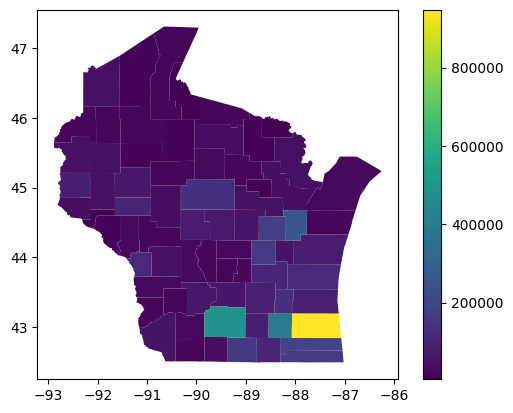

In [4]:
#Q2
fig, ax = plt.subplots()
gdf.plot(ax = ax, column = "POP100", legend = True)

In [5]:
#Feature 1
conn = sqlite3.connect("counties_tracts.db")
red = pd.read_sql("""SELECT * FROM counties""", conn)
gdf["AREALAND"] = red["AREALAND"]
train, test = train_test_split(gdf, random_state = 250, test_size=0.25)

In [6]:
#Q3
q3 = list(test["NAME"])
q3

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [7]:
#Q4
xcols = ["AREALAND"]
ycol = "POP100"

model = LinearRegression()
model.fit(train[xcols], train[ycol])

q4 = model.score(test[xcols], test[ycol])
q4

0.016720430179409274

In [8]:
#Q5
y = model.predict(test[xcols])
predictdf = pd.DataFrame({"AREALAND": [600*2.59*1000*1000]})
q5 = model.predict(predictdf)[0]
q5

78504.52061277494

In [9]:
#Feature 2
feature2 = pd.read_sql("""SELECT SUM(tracts.HU100) as HU100, counties.NAME FROM tracts LEFT JOIN counties ON tracts.COUNTY = counties.COUNTY GROUP BY counties.NAME""", conn)
gdf.set_index("NAME", inplace=True)
feature2.set_index("NAME", inplace = True)
feature2 = feature2.reindex(gdf.index)
gdf.reset_index(inplace=True)
feature2.reset_index(inplace=True)
gdf["HU100"] = feature2["HU100"]
train, test = train_test_split(gdf, random_state = 250, test_size=0.25)

In [10]:
#Q6
q6 = list(test["NAME"])
q6

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [11]:
#Q7
dicty = {}
for county in q6:
    dicty[county] = gdf.set_axis(gdf["NAME"]).loc[county, "HU100"]
dicty

{'Dane County': 216022,
 'Juneau County': 14669,
 'Taylor County': 10582,
 'Vilas County': 25116,
 'Rusk County': 8883,
 'Price County': 11120,
 'Jackson County': 9727,
 'Waushara County': 14843,
 'Pepin County': 3579,
 'Douglas County': 22825,
 'Ashland County': 9656,
 'Milwaukee County': 418053,
 'Waupaca County': 25396,
 'Richland County': 8868,
 'Lafayette County': 7230,
 'Washburn County': 12979,
 'Dunn County': 17964,
 'Bayfield County': 12999}

In [12]:
#Q8
score = cross_val_score(LinearRegression(), train[["HU100"]], train["POP100"]).mean()
score

0.9739348181232653

In [13]:
#Q9
q9 = cross_val_score(LinearRegression(), train[["HU100"]], train["POP100"]).std()
q9

0.01693954236334351

In [14]:
#Q10
model = LinearRegression()
model.fit(train[["HU100"]], train["POP100"])
coef = model.coef_[0]
coef = str(round(coef, 2))
intercept = model.intercept_
intercept = str(round(intercept, 2))
string = "POP100 = ?1?*HU100 + ?2?"
q10 = string.replace("?1?", coef).replace("?2?", intercept)
q10

'POP100 = 2.47*HU100 + -9276.89'

Text(104371, 248007, 'Brown')

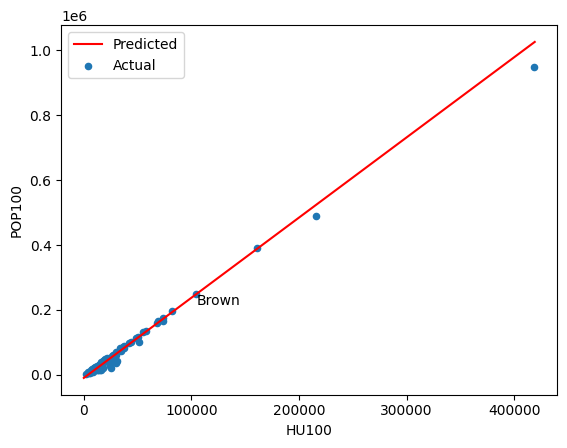

In [15]:
#Q11
predictdf = pd.DataFrame({"HU100": range(0, 420000, 1000)})
predictdf["POP100"] = model.predict(predictdf)
ax = predictdf.plot.line(x = "HU100", y = "POP100", color = "r", label = "Predicted")
gdf.plot.scatter(ax = ax, x = "HU100", y = "POP100", label = "Actual", legend = True)
ax.text(gdf.set_axis(gdf["NAME"]).loc["Brown County", "HU100"], gdf.set_axis(gdf["NAME"]).loc["Brown County", "POP100"], "Brown", ha="left", va="top")

In [16]:
#Q12
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])
B = A[A >= 3]
C = B[B<=6]
q12 = len(C)
q12

8

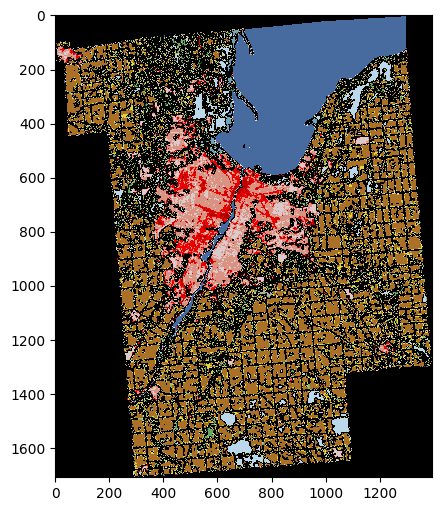

In [17]:
#Q13

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

brown = gpd.read_file("counties.geojson")

land = rasterio.open("zip://land.zip")
matrix, _ = mask(land, [brown.to_crs(land.crs).set_axis(brown["NAME"]).loc["Brown County", "geometry"]], crop = True)
matrix = matrix[0]
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(matrix, vmin=0, vmax=255, cmap = custom_cmap)


In [18]:
#Q14
m1 = matrix[matrix != 0]
m = (m1 == 11).astype(int).mean()
m

0.13797526789725206

<AxesSubplot:xlabel='Herbacious Wetlands Cells in County', ylabel='POP'>

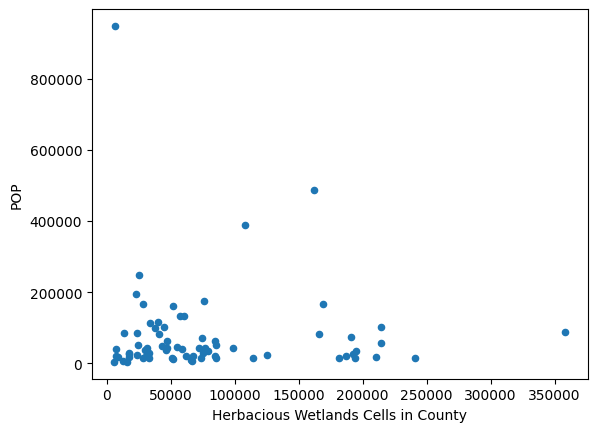

In [19]:
#Q15
popdict = {"Herbacious Wetlands Cells in County": [], "POP": []}
for name in brown["NAME"]:
    matrix, _ = mask(land, [brown.to_crs(land.crs).set_axis(brown["NAME"]).loc[name, "geometry"]], crop = True)
    matrix = matrix[0]
    m2 = matrix[matrix != 0]
    sumth = (m2 == 95).astype(int).sum()
    popdict["Herbacious Wetlands Cells in County"].append(sumth)
    popdict["POP"].append(brown.set_axis(brown["NAME"]).loc[name, "POP100"])

plotty = pd.DataFrame(popdict)
plotty.plot.scatter(x = "Herbacious Wetlands Cells in County", y = "POP")

In [20]:
#Part 1
shape = gpd.read_file('tracts.shp')
shaped = shape.to_crs(land.crs).set_axis(shape["GEOID"])

land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

dicty = {key:[] for key in land_use}

for gid in shape["GEOID"]:
    matrix, _ = mask(land, [shaped.loc[gid, "geometry"]], crop = True)
    matrix = matrix[0]
    m2 = matrix[matrix != 0]

    for key in land_use:
        sumth = (m2 == land_use[key]).astype(int).sum()
        dicty[key].append(sumth)
        shape[key] = pd.Series(dicty[key])
#shape

<AxesSubplot:>

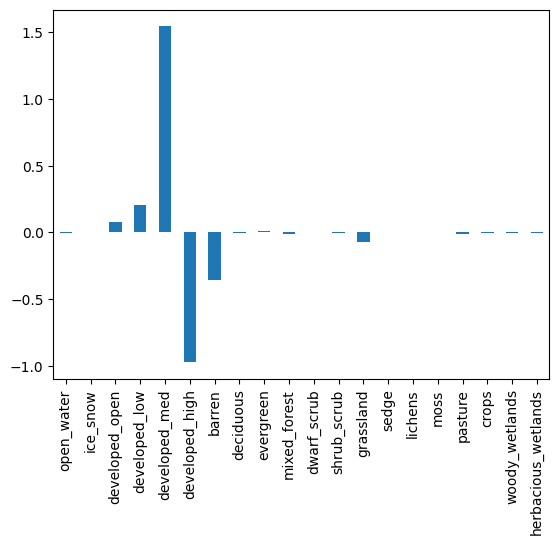

In [21]:
#Q16
train, test = train_test_split(shape, random_state=300, test_size=0.20)
xcols = land_use.keys()
ycol = "POP100"
model = LinearRegression()
model.fit(train[xcols], train[ycol])
pd.Series(model.coef_, index=xcols).plot.bar()
#The graph is showing which are the largest coefficients and therefore influence the results the most because it relies on 
#that corresponding column more. It also shows that posiitve vlaues have a direct relation and negative has an inverse relationship
#I can use this information to match the relative struture of weights while following the correct relationships and their effects.

In [22]:
train, test = train_test_split(shape, random_state=300, test_size=0.20)
xcols1 = ["developed_med", "developed_high", "developed_low", "grassland"]
ycol = "POP100"
model1 = LinearRegression()
score1 = cross_val_score(model1, train[xcols], train[ycol])
mean1 = score1.mean()
variance1 = score1.var()


xcols2 = ["open_water", "mixed_forest", "barren", "pasture"]
model2 = LinearRegression()
score2 = cross_val_score(model2, train[xcols2], train[ycol])
mean2 = score2.mean()
variance2 = score2.var()

print(f"mean1: {mean1}, variance1: {variance1}, mean2: {mean2}, variance2: {variance2}")

mean1: 0.4825569818938578, variance1: 0.0036914241246339156, mean2: 0.05884496492462112, variance2: 0.0008311221783904468


In [23]:
#Q17
# model2 contains a lower variance score, which is better, but when one takes into account the mean score, the difference is dramatic.
# the difference in the means is about 0.43 higher, which is an incredible difference and undoubtly means model1 scores higher overall
# to add on, the differnece in variances is small, and they are both small to begin with, so model1 is still the better choice
# Therefore I reccomend that model1 be chosen as the best model.

# Here is the next part of the question
model1.fit(train[xcols1], train[ycol])
predictdf = model1.predict(test[xcols1])
explained_variance_score = sklearn.metrics.explained_variance_score(test[ycol], predictdf)
explained_variance_score

0.3936987276715349